# Data Science and Stem Salaries (Part One)

### This dataset contains information regarding salaries in technology from June 2017 to August 2021. 

### We will be looking at the following questions: 
### 1. What is the highest paying tech job? 
### 2. What are the highest paying companies? 
### 3. What companies pay the highest salaries? 
### 4. Is there a correlation between education and salary? 
### 5. Is there a correlation between years at a company and salary? 
### 6. Is there a correlation between years of experience and salary? 
### 7. Is there a correlation between location and salary? 
### 8. Where are the majority of tech jobs located? 
### 9. Do men or women earn higher salaries? 

In [26]:
# Importing libraries and dataset
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df_sal = pd.read_csv(r'/Users/melanie/Desktop/Data Science and STEM Salaries/Data/Levels_Fyi_Salary_Data.csv')

# Cleaning the Data

In [28]:
# Data Checks 
df_sal

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,17-Jun,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,17-Jun,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,17-Jun,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,17-Jun,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,17-Jun,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,18-Sep,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,18-Sep,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,18-Sep,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,18-Sep,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN


In [29]:
df_sal.shape

(62642, 29)

In [30]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [31]:
df_sal['cityid'] = df_sal['cityid'].astype('str')

In [32]:
df_sal['cityid'].dtype

dtype('O')

In [33]:
# Dropping columns that are not needed
df_sal = df_sal.drop(columns = ['level', 'tag', 'stockgrantvalue', 'otherdetails', 'dmaid', 'rowNumber', 'Race', 'Education'])

In [34]:
df_sal.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,17-Jun,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,10000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,17-Jun,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,17-Jun,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,17-Jun,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,35000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,17-Jun,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_sal.shape

(62642, 21)

In [36]:
# Renaming columns 
df_sal = df_sal.rename(columns = {'timestamp' : 'date',  'totalyearlycompensation' : 'total_yearly_compensation', 
                         'yearsofexperience' : 'years_of_experience', 'yearsatcompany' : 'years_at_company', 
                         'basesalary' : 'base_salary', 'cityid': 'city_id', 'Highschool' : 'High_School'})

In [37]:
# Looking at job titles
df_sal.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

In [38]:
# Looking at number of nulls
print(df_sal.shape)
df_sal.isnull().sum()

(62642, 21)


date                             0
company                          5
title                            0
total_yearly_compensation        0
location                         0
years_of_experience              0
years_at_company                 0
base_salary                      0
bonus                            0
gender                       19540
city_id                          0
Masters_Degree                   0
Bachelors_Degree                 0
Doctorate_Degree                 0
High_School                      0
Some_College                     0
Race_Asian                       0
Race_White                       0
Race_Two_Or_More                 0
Race_Black                       0
Race_Hispanic                    0
dtype: int64

In [39]:
# Filling Null values with "Unknown"
df_sal = df_sal.fillna({'company' : 'Unknown', 'gender' : 'Unknown'})

In [40]:
# Double checking that the NA values were filled
print(df_sal.shape)
df_sal.isnull().sum()

(62642, 21)


date                         0
company                      0
title                        0
total_yearly_compensation    0
location                     0
years_of_experience          0
years_at_company             0
base_salary                  0
bonus                        0
gender                       0
city_id                      0
Masters_Degree               0
Bachelors_Degree             0
Doctorate_Degree             0
High_School                  0
Some_College                 0
Race_Asian                   0
Race_White                   0
Race_Two_Or_More             0
Race_Black                   0
Race_Hispanic                0
dtype: int64

In [41]:
# Checking for duplicates
df_dups = df_sal[df_sal.duplicated()]

In [42]:
df_dups

,date,company,title,total_yearly_compensation,location,years_of_experience,years_at_company,base_salary,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,High_School,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
450,18-Jun,Intuit,Software Engineer,422000,"Mountain View, CA",6.0,3.0,203000,47000.0,Male,...,0,0,0,0,0,0,0,0,0,0
538,18-Jun,Workday,Software Engineer,135000,"Pleasanton, CA",2.0,2.0,113000,5000.0,Male,...,0,0,0,0,0,0,0,0,0,0
677,18-Aug,Microsoft,Software Engineer,141000,"Redmond, WA",1.0,1.0,118000,15000.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
696,18-Aug,Amazon,Solution Architect,250000,"Seattle, WA",15.0,2.0,0,0.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
697,18-Aug,Amazon,Solution Architect,250000,"Seattle, WA",15.0,2.0,0,0.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61739,21-Aug,HSBC,Software Engineer,159000,"New York, NY",8.0,3.0,147000,12000.0,Male,...,1,0,0,0,0,0,0,0,0,1
61924,19-Jul,The Home Depot,Software Engineer,95000,"Marietta, GA",1.0,1.0,95000,5000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62193,18-Apr,Nordstrom,Product Manager,130000,"Seattle, WA",5.0,1.0,113500,17000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62240,19-Mar,IBM,Data Scientist,155000,"Washington, DC",5.0,2.0,141000,14000.0,Male,...,0,0,0,0,0,0,0,0,0,0


### There are 358 rows of duplicates. 

In [43]:
# Removing the duplicates
df_sal.shape

(62642, 21)

In [44]:
df_sal = df_sal.drop_duplicates()

In [45]:
df_sal.shape

(62284, 21)

In [46]:
# Checking how many rows were removed
62642 - 62284

358

In [47]:
# Checking for mixed type data
for col in df_sal.columns.tolist():
      weird = (df_sal[[col]].applymap(type) != df_sal[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_sal[weird]) > 0:
        print (col)
        

### No mixed type columns found. 

In [48]:
# Export cleaned datafile as csv 
df_sal.to_csv(r'/Users/melanie/Desktop/Data Science and STEM Salaries/Data/Levels_Fyi_Salary_Data_cleaned.csv', index = False)

# Analyzing and Visualizing the Data

Text(0.5, 1.0, 'Average Yearly Compensation by Title')

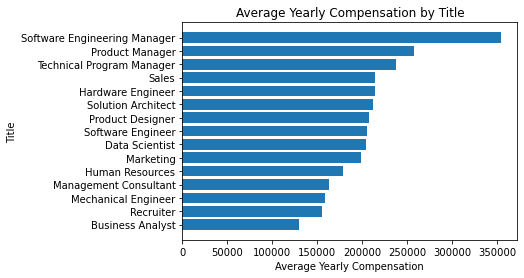

In [49]:
# Creating horizontal bar chart visualizing the avg yearly compensation per title
job_title = df_sal[['company', 'title', 'total_yearly_compensation']].groupby(['title'])\
                                                                                .mean()\
                                                                                .round(2)\
                                                                                .sort_values('total_yearly_compensation',
                                                                                             ascending = True)
plt.barh(job_title.index, job_title.total_yearly_compensation)
plt.ylabel('Title')
plt.xlabel('Average Yearly Compensation')
plt.title('Average Yearly Compensation by Title')

### Software engineering manager has the highest average annual compensation.

In [50]:
# Visualizing the highest paying companies
df_sal.company.value_counts()

Amazon              8059
Microsoft           5185
Google              4305
Facebook            2968
Apple               2019
                    ... 
S&P GLOBAL             1
Bny Mellon             1
Bloomberg lp           1
Makemytrip             1
tableau software       1
Name: company, Length: 1632, dtype: int64

Text(0.5, 1.0, 'Top Ten Companies That Pay Highest Yearly Compensation')

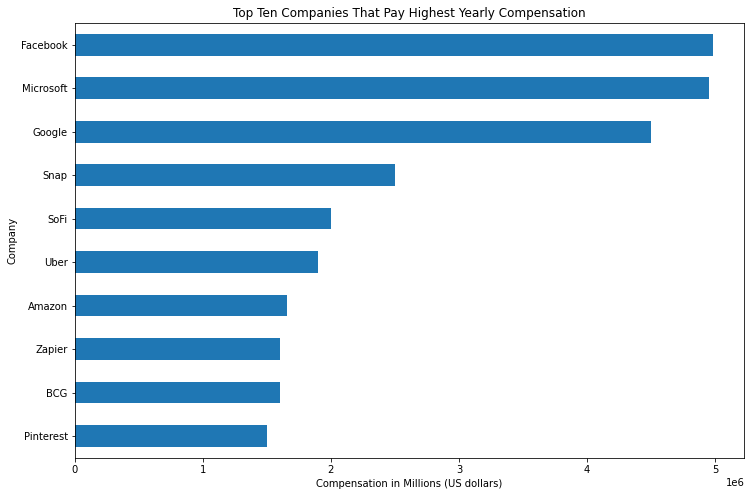

In [51]:
# Deciding to look at the top ten highest paying companies
highest_paying_comp = df_sal[['company', 'title', 'total_yearly_compensation']].groupby(['company'])\
                                                                                .max()\
                                                                                .sort_values('total_yearly_compensation',
                                                                                             ascending = False)\
                                                                                .head(10)\
                                                                                .sort_values('total_yearly_compensation', 
                                                                                            ascending = True)\
                                                                                .plot.barh(figsize = (12, 8), legend = False);
plt.ylabel('Company')
plt.xlabel('Compensation in Millions (US dollars)')
plt.title('Top Ten Companies That Pay Highest Yearly Compensation')                                                                              

### Facebook pays the highest yearly compensation, followed closely by Microsoft. 

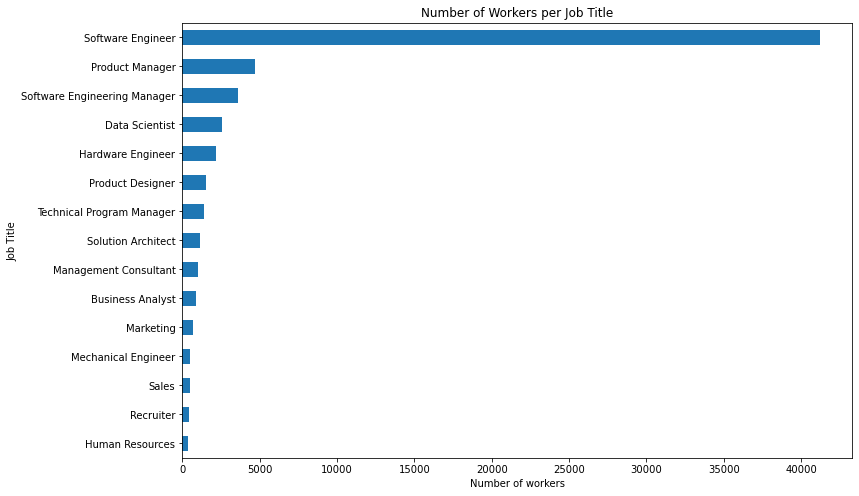

In [64]:
# Looking at the number of workers in each job title
top_jobs = df_sal['title'].value_counts(ascending = True)
top_jobs.plot.barh(figsize =(12,8))
plt.title('Number of Workers per Job Title')
plt.xlabel('Number of workers')
plt.ylabel('Job Title')
plt.show();

### The most common job title by far is software engineer. 

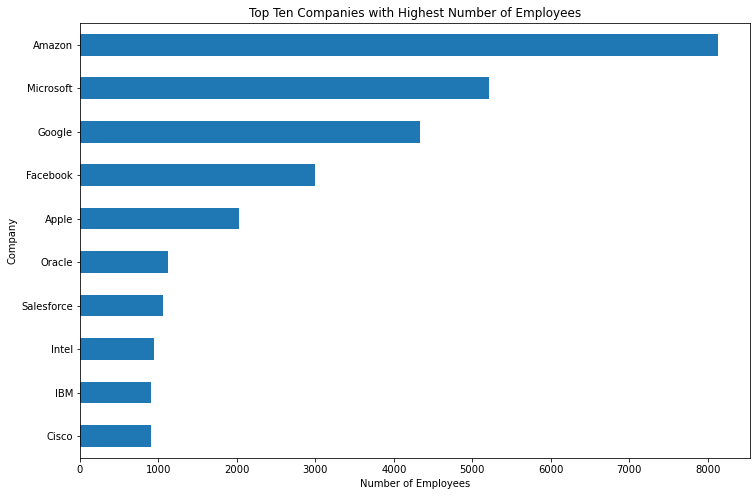

In [66]:
# The top ten companies that have the highest number of employees
tech_workers = df_sal['company'].value_counts(ascending = False).head(10).sort_values(ascending =
                                                                                     True).plot.barh(figsize =(12,8))
plt.title('Top Ten Companies with Highest Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Company')
plt.show();

### Amazon has the highest number of employees. 

In [82]:
# Do men or women earn higher salaries?
df_sal['gender'].unique()

array(['Unknown', 'Male', 'Female', 'Other',
       'Title: Senior Software Engineer'], dtype=object)

In [85]:
# Need to replace Senior Software Engineer with Unknown since it is not a gender type
df_sal = df_sal.replace('Title: Senior Software Engineer', 'Unknown')
df_sal['gender'].unique()

array(['Unknown', 'Male', 'Female', 'Other'], dtype=object)

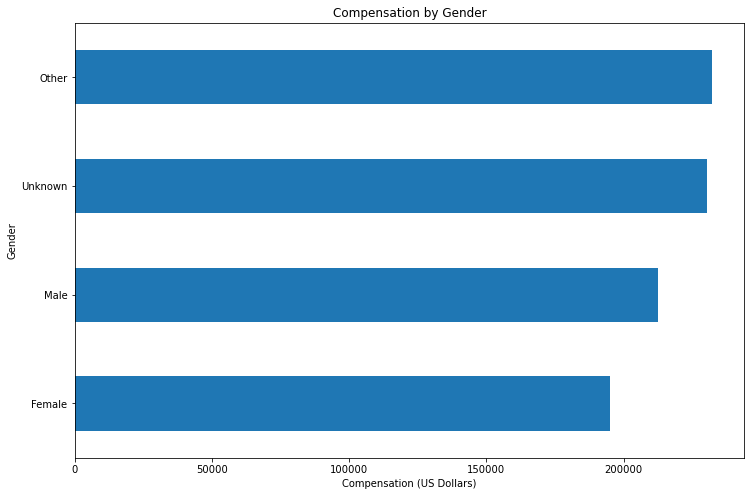

In [86]:
# Compensation by gender
gender_pay = df_sal[['total_yearly_compensation', 'gender']].groupby(['gender']).mean().round(2)\
                                                                    .sort_values('total_yearly_compensation', ascending = False)\
                                                                    .head(10)\
                                                                    .sort_values('total_yearly_compensation', ascending = True)\
                                                                    .plot.barh(figsize = (12,8), legend = False);

plt.title('Compensation by Gender')
plt.xlabel('Compensation (US Dollars)')
plt.ylabel('Gender')
plt.show();

### Males do make more money than females, but this could be due there being several "unknown" or "other" values that could change the analysis. 